# Tarea 1
## Física Computacional
### Hernández Ramos Sandra 
$Sandii\hbar ers^{\heartsuit}$



## Python 


In [1]:
from pylab import * 
import random
from numpy import array 
from numpy import *
import math
from scipy.integrate import*
%matplotlib inline 
 # %matplotlib inline para que el despliegue gráfico se haga dentro del mismo notebook
#paqueterías.

### Resuelva los siguientes ejercicios, explicando claramente su razonamiento.
Nota: Considere algoritmos simétricos en el cálculo de derivada, excepto para los puntos en la frontera

#### 1. Realice y explique los desarrollos necesarios para obtener los siguientes algoritmos:

a)  Encuentre una expresión para la segunda derivada numérica de orden 4 con malla uniforme. (Se desprecian términos $h^{5}$
en la serie de Taylor)

Considerando los algoritmos simétricos desarrollamos simétricamente las series de Taylor, por lo que que desarrollando la serie de Taylor la función f tendrá cuatro puntos alrededor de $x_{0}$:
$$
f(x_0+h)=f(x_0) + f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 + \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-h)=f(x_0) - f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 - \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0+2h)=f(x_0) + 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-2h)=f(x_0) - 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$

para este caso vamos a tener que despreciar los términos $h^{5}$ en la serie y sumando la primera con la segunda expresión, la cuarta y la quinta tenemos las siguientes dos ecuaciones (desaparece $h^{3}$):

$$
f(x_0+h)+f(x_0-h)=2f(x_0)+f^{(2)}(x_0)h^2 + \frac{1}{12}f^{(4)}(x_0)h^4
$$
$$
f(x_0+2h)+f(x_0-2h)=2f(x_0)+4f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$


como quiero tener $\frac{4}{3}$ en ambos lados multiplicando 16 a la primer ecuación y -1 a la segunda para poder restar
($16\times \frac{1}{12} = \frac{16}{12}=\frac{4}{3}$),teniendo así: 
$$
16f(x_0+h)+16f(x_0-h)=32f(x_0) + 16f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$
$$
-f(x_0+2h)-f(x_0-2h)=-2f(x_0)-4f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(4)}(x_0)h^4
$$


Ahora sumando las ecuaciones anteriores tenemos (desaparece $h^{4}$):
$$
16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h)=30f(x_0)+12f^{(2)}(x_0)h^2
$$

Ahora solo nos queda despejar $f^{(2)}(x_{0})$ (expresión de la segunda derivada de orden cuatro):

$$
f^{(2)}(x_0) = \frac{16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h) - 30f(x_0)}{12h^2}
$$

Como se tomaron las $h=x_{i+1}-x_i$, en la expresión de la segunda derivada de orden cuatro solo se está haciendo uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$,  pero esto no es válido para los puntos en la frontera.

Ahora obteniendo la derivada para los puntos frontera.

Procediendo por el caso de la frontera izquierdo tomaremos los puntos de la derecha h,2h,3h y 4h y se desarrolla la serie de Taylor despreciando $h^{5}$:

$$f(x_0+h)=f(x_0)+hf^{(1)}(x_0)+{\frac{1}{2}}f^{(2)}(x_0)h^{2}+\frac{f^{(3)}(x_0)}{3!}h^{3}+{\frac{f^{(4)}}{4!}}h^{4} $$

$$f(x_0+2h)=f(x_0)+2hf^{(1)}(x_0)+{\frac{4}{2}}f^{(2)}(x_0)h^{2}+\frac{8f^{(3)}(x_0)}{3!}h^{3}+{16\frac{f^{(4)}}{4!}}h^{4}$$

$$f(x_0+3h)=f(x_0)+3hf^{(1)}(x_0)+{\frac{9}{2}}f^{(2)}(x_0)h^{2}+\frac{27f^{(3)}(x_0)}{3!}h^{3}+{81\frac{f^{(4)}}{4!}}h^{4} $$

$$f(x_0+4h)=f(x_0)+4hf^{(1)}(x_0)+{\frac{16}{2}}f^{(2)}(x_0)h^{2}+\frac{64f^{(3)}(x_0)}{3!}h^{3}+{256\frac{f^{(4)}}{4!}}h^{4}$$


Escribiendo el sistema de ecuaciones anterior de forma matricial tenemos:
$$\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{6} & \frac{1}{24}\\
2 & \frac{4}{2} & \frac{8}{6} & \frac{16}{24}\\
3 & \frac{9}{2} & \frac{27}{6}& \frac{81}{24}\\
4 & \frac{16}{2}& \frac{64}{6}& \frac{256}{24}\\
\end{bmatrix} \begin{bmatrix} hf_i' \\h^2f_i''\\ h^3f_i'''\\ h^4f_i''''\\\end{bmatrix} =\begin{bmatrix}f_{i+1}-f_i \\
f_{i+2}-f_i\\
f_{i+3}-f_i \\
f_{i+4}-f_i 
\end{bmatrix}$$


simplificando las fracciones tenemos:
$$\longrightarrow \begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{6} & \frac{1}{24}\\
2 & 2 & \frac{4}{3} & \frac{2}{3}\\
3 & \frac{9}{2} & \frac{9}{3}& \frac{27}{8}\\
4 & 8& \frac{32}{3}& \frac{32}{3}\\
\end{bmatrix} \begin{bmatrix} hf_i' \\h^2f_i''\\ h^3f_i'''\\ h^4f_i''''\\\end{bmatrix} =\begin{bmatrix}f_{i+1}-f_i \\
f_{i+2}-f_i\\
f_{i+3}-f_i \\
f_{i+4}-f_i 
\end{bmatrix}$$


Metiendo esta matriz a una calculadora de matrices ([Resolver sistemas de ecuaciones lineales online](https://matrixcalc.org/es/slu.html#solve-using-Gauss-Jordan-elimination%28%7B%7B1,1/2,1/6,1/24,x%7D,%7B2,2,4/3,2/3,y%7D,%7B3,9/2,9/2,27/8,z%7D,%7B4,8,32/3,32/3,w%7D%7D%29) porque #flojera) y resolviendo por el método de Gauss-Jordan obtenemos $f^{(2)}(x_{0})h^{2}$(que aparece como $x_{2}$ en la calculadora)

$x_{2}=\frac{(11w-104x+114y-56z)}{12}$ con $x=f_{i+1}-f_i$, $y=f_{i+2}-f_i$, $z=f_{i+3}-f_i$, $w=f_{i+4}-f_i$

Entonces tenemos
$$f^{(2)}(X_{0})h^{2}=\frac{(11(f_{i+4}-f_i)-104(f_{i+1}-f_i)+114(f_{i+2}-f_i)-56(f_{i+3}-f_i))}{12}$$

$$\longrightarrow f^{(2)}(X_{0})=\frac{\frac{11}{12}(f_{i+4}-f_i)-\frac{104}{12}(f_{i+1}-f_i)+\frac{114}{12}(f_{i+2}-f_i)-\frac{56}{12}(f_{i+3}-f_i)}{h^{2}}$$

Reacomodando y simplificando tenemos:
$$\longrightarrow f^{(2)}(X_{0})=\frac{-\frac{104}{12}(f_{i+1}-f_i)+\frac{114}{12}(f_{i+2}-f_i)-\frac{56}{12}(f_{i+3}-f_i)+\frac{11}{12}(f_{i+4}-f_i)}{h^{2}}$$
$$\longrightarrow f^{(2)}(X_{0})=\frac{-\frac{26}{3}(f_{i+1}-f_i)+\frac{19}{2}(f_{i+2}-f_i)-\frac{14}{3}(f_{i+3}-f_i)+\frac{11}{12}(f_{i+4}-f_i)}{h^{2}}$$

Desarrollando tenemos:
$$\longrightarrow f^{(2)}(X_{0})=\frac{-\frac{26}{3}f_{i+1}+\frac{19}{2}f_{i+2}-\frac{14}{3}f_{i+3}+\frac{11}{12}f_{i+4}+\frac{26}{3}f_i-\frac{19}{2}f_i+\frac{14}{3}f_i-\frac{11}{12}f_i}{h^{2}}$$

$$\longrightarrow f^{(2)}(X_{0})=\frac{-\frac{26}{3}f_{i+1}+\frac{19}{2}f_{i+2}-\frac{14}{3}f_{i+3}+\frac{11}{12}f_{i+4}+\frac{35}{12}f_i}{h^{2}}$$




La ecuación anterior funciona para la frontera izquierda, para el segundo punto en la malla solo se toma a $i\rightarrow i+1$ y para la frontera derecha  $i+1\rightarrow i-1$, $i+2\rightarrow i-2$, $i+3\rightarrow i-3$, $i+4\rightarrow i-4$, con i=N. 

Con lo anterior podemos definir una función en Python para obtener la segunda derivada de orden 4 en los puntos extremos. 

In [71]:
# Ahora a definir la segunda derivada de orden 4 para una función f y cuya malla es uniforme.
def deriv(f,x): #se define la funcion deriv con argumentos (f,x)
    f_p1 = zeros(len(f)) 
    h=x[1]-x[0]
   
    for i in range (2,len(f)-2):
        f_p1[i]=(16*f[i+1]+16*f[i-1]-f[i+2]-f[i-2]-30*f[i])/(12*h*h)
    
      #Para calular los puntos frontera a la izquierda
        f_p1[0] = (-(26/3)*f[1]+(19/2)*f[2]-(14/3)*f[3]+(11/12)*f[4]+(35/12)*f[0])/(h*h)  
        f_p1[1] = (-(26/3)*f[2]+(19/2)*f[3]-(14/3)*f[4]+(11/12)*f[5]+(35/12)*f[1])/(h*h)
        
      #Para calular los puntos frontera a la derecha  
        f_p1[-2]=((-26/3)*f[-3]+(19/2)*f[-4]-(14/3)*f[-5]+(11/12)*f[-6]+(35/12)*f[-2])/(h*h) 
        f_p1[-1]=((-26/3)*f[-2]+(19/2)*f[-3]-(14/3)*f[-4]+(11/12)*f[-5]+(35/12)*f[-1])/(h*h)
    return f_p1

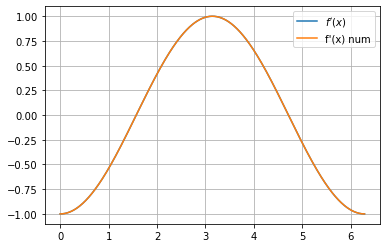

In [72]:
# Para comprobar que la función anterior se aproxima a la segunda derivada en una función f con una malla uniforme
#Se escoge la malla uniforme
x1 = linspace(0,2*pi,500)
#usamos una función de prueba
y1 =cos(x1)
y_deriv2 =-cos(x1)
y_num_deriv2 = deriv(y1,x1)
#Graficamos para ver que la derivada numerica sí concuerda con la derivada analítica 
plot(x1,y_deriv2,label="$f'(x)$")
plot(x1,y_num_deriv2,label="f'(x) num")
legend(),grid()
show()

b) Encuentre una expresión para la derivada numérica de $2^{\circ}$ orden para una malla no uniforme. (Se desprecian términos $h^{3}$ en la serie de Taylor)

Como se quiere encontrar la derivada en una malla no uniforme $h$ toma dos valores, $h_{1}$ para el lado izquierdo y a $h_{2}$ para el lado derecho mientras se desprecian los términos de $h^{3}$ por lo que que desarrollando la serie de Taylor alrededor de $x_{0}$ tenemos:
$$f(x_0-h_1)=f(x_0)-f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)$$ 

$$f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)$$

Ahora multiplicando la primera ecuación por $h_2^{2}$ y la segunda por $h_1^{2}$ tenemos:
$$ h_2^{2}f(x_0-h_1)=h_2^{2}f(x_0)-h_2^{2}f^{(1)}(x_0)h_1+{\frac{1}{2}}f^{(2)}(x_0)h_1^{2}h_2^{2}+\mathcal{O}(h^{3})$$

$$h_1^{2}f(x_0+h_2)=h_1^{2}f(x_0)+h_1^{2}f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^{2} h_1^{2} + \mathcal{O}(h^3)$$

En este paso vamos a despreciar a $h^{3}$ y restar la primera ecuación a la segunda teniendo así:
$$h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)=f(x_0)(h_1^{2}-h_2^{2})+f^{(1)}(x_0)(h_2^{2}h_1+h_2h_1^{2}) $$

Ahora solo nos queda despejar $f^{(1)}(x_{0})$ (expresión de la derivada de orden 2):
$$f^{(1)}(x_0)=\frac{h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)-f(x_0)(h_1^{2}-h_2^{2})}{(h_2^{2}h_1+h_2h_1^{2})}$$

La ecuación anterior no es válida para los puntos frontera

Ahora obteniendo la derivada para los puntos frontera.

Para la frontera derecha tomaremos $h_1=x_{1}-x_{0}$, $h_{2}=x_{2}-x_{0}$ y se desarrolla la serie de Taylor despreciando $h^{3}$ tenemos:
$$f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 $$

$$f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 $$

Escribiendo el sistema de ecuaciones anterior de forma matricial tenemos:
$$\begin{bmatrix}
h_1 & \frac{1}{2}h_{1}^{2} \\
h_2 & \frac{1}{2}h_{2}^{2}  \\
\end{bmatrix} \begin{bmatrix} f_{i}' \\f_{i}''\\\end{bmatrix} =\begin{bmatrix}f_{i+1}-f_{i} \\
f_{i+2}-f_{i}\\ 
\end{bmatrix}$$




Resolviendo de la misma forma que se hizo con a) tenemos:
$$f^{(1)}(x_0)=\frac{-(f_{i+2}-f_i)h_1^{2}+h_2^{2}(f_{i+1}-f_i)}{h_1h_2^{2}-h_1^{2}h_2} $$

Desarrollando tenemos:
$$f^{(1)}(x_0)=\frac{-f_{i+2}h_{1}^{2}+f_{i}h_1^{2}+f_{i+1}h_2^{2}-f_{i}h_2^{2}}{h_1h_2^{2}-h_1^{2}h_2} $$


Reacomodando:
$$\longrightarrow f^{(1)}(x_0)=\frac{f_{i+1}h_2^{2}-f_{i+2}h_{1}^{2}+f_{i}h_1^{2}-f_{i}h_2^{2}}{h_1h_2^{2}-h_1^{2}h_2} $$

Por propiedad distributiva se puede hacer lo  siguiente:
$$\longrightarrow f^{(1)}(x_0)=\frac{f_{i+1}h_2^{2}-f_{i+2}h_{1}^{2}+f_{i}\left(h_1^{2}-h_2^{2}\right)}{h_1h_2^{2}-h_1^{2}h_2} $$

La ecuación anterior funciona para la frontera izquierda, para frontera derecha se hacen los siguientes cambios: $i+1\rightarrow i-1$, $i+2\rightarrow i-2$ con i=N. 

Con lo anterior podemos definir una función en Python para obtener la derivada de orden 2 con una malla no uniforme

In [73]:
#Ahora a definir la derivada de orden 2 con una malla no uniforme
def deriv_1(f,x): #se define la funcion deriv con argumentos (f,x)
    f_p = zeros(len(f))
    for i in range (1,len(f)-1):
        f_p[i]=(((x[i]-x[i-1])**2)*(f[i+1])-((x[i+1]-x[i])**2)*f[i-1]-f[i]*((x[i]-x[i-1])**2-(x[i+1]-x[i])**2))/((x[i+1]-x[i])**2*(x[i]-x[i-1])+(x[i]-x[i-1])**2*(x[i]-x[i-1]))
    #Derivada en la frontera
        h1=x[1]-x[0]
        h2=x[2]-x[0]
        
        h11=(x[-1]-x[-2])
        h22=(x[-1]-x[-3])
        ## Para la frontera izquierda
        f_p[0]=(-h1**2*f[2]+h2**2*f[1]+f[0]*(-h2**2+h1**2))/(h1*h2**2-h1**2*h2)
        #Para la frontera derecha
        f_p[-1]=((+h11**2*f[-3])-h22**2*f[-2]+f[-1]*(+h22**2-h1**2))/(h11*h22**2-h11**2*h22)
    return f_p

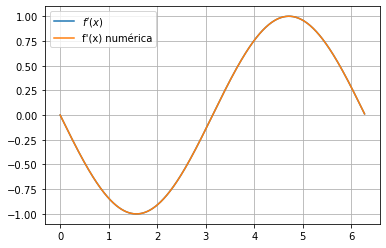

In [74]:
#Para comprobar que la función anterior se aproxima a la derivada en una función f con una malla uniforme
#Se escoge la malla uniforme
x = (np.linspace(0, 2*pi, 500, endpoint=False))
#Usamos una función de prueba
y = cos(x)
y_deriv =-sin(x)
y_deriv_1_num = deriv_1(y,x)

#Graficamos para ver que la derivada numerica sí concuerda con la derivada analítica 
plot(x,y_deriv,label="$f'(x)$")
plot(x,y_deriv_1_num,label="f'(x) numérica")
legend(),grid()
show()


c)Encuentre una expresión para la segunda derivada numérica de $2^{\circ}$ orden con malla no uniforme. (Se desprecian términos $h^{3}$ en la serie de Taylor)

Como se quiere encontrar la segunda derivada en una  malla ni uniforme $h$ toma dos valores, $h_{1}$ para el lado izquiero y $h_{2}$  para el lado derecho mientras se desprecian los términos de $h^{3}$ por lo que que desarrollando la serie de Taylor alrededor de $x_{0}$ tenemos:

$$f(x_0-h_1)=f(x_0)-f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h_{1}^{3})$$

$$f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h_{2}^{3})$$

Ahora multiplicando por $h_2$ la primera ecuación y por $h_2$ la segunda tenemos:
$$ h_2f(x_0-h_1)=h_2f(x_0)-h_2f^{(1)}(x_0)h_1+\frac{1}{2}h_2f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$

$$ h_1f(x_0+h_2)=h_1f(x_0)+h_1f^{(1)}(x_0)h_2+\frac{1}{2}h_1f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

En este paso vamos a despreciar a $h^{3}$ y sumando las ecuaciones anteriores tenemos (desaparece $f^{(1)}$):
$$h_2f(x_0-h_1)+h_1f(x_0+h_2)=f(x_0)(h_2+h_1)+{\frac{1}{2}}f^{(2)}(x_0)(h_2h_1^{2}+h_1h_2^{2}) $$

Ahora solo nos queda despejar $f^{(2)}(x_{0})$ (expresión de la segunda derivada de orden 2)

$$f^{(2)}(x_0)=2 \cdot \left(\frac{h_2f(x_0-h_1)+h_1f(x_0+h_2)-f(x_0)(h_2+h_1)}{(h_2h_1^{2}+h_1h_2^{2})}\right) $$

La ecuación anterior no es válida para los puntos frontera

Ahora obteniendo la dervida para los puntos 

Para la frontera derecha tomaremos $h_1=x_1-x_0$, $h_2=x_2-x_0$ se desarrolla la serie de Taylor despreciando $h^{3}$ tenemos:

$$f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 $$

$$f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 $$

Escribiendo el sistema de ecuaciones anterior de forma matricial tenemos:
$$\begin{bmatrix}
h_1 & \frac{h_{1}^{2}}{2} \\
h_2 & \frac{h_{2}^{2}}{2} \\
\end{bmatrix} \begin{bmatrix} f_{i}' \\f_{i}''\\\end{bmatrix} =\begin{bmatrix}f_{i+1}-f_{i} \\
f_{i+2}-f_{i}\\ 
\end{bmatrix}$$

Resolviendo de la misma forma que se hizo con los incisos anteriores tenemos:
$$f^{(2)}(x_0)= 2\cdot\left({\frac{(f_{i+2}-f_i)h_1-(f_{i+1}-f_i)h_2}{h_1h_2^{2}-h_1^{2}h_2}}\right)  $$

Desarrollando tenemos:
$$f^{(2)}(x_0)= 2\cdot\left({\frac{f_{i+2}h_{1}-f_{i} h_{1}-f_{i+1}h_{2}+f_{i}h_{2}}{h_1h_2^{2}-h_1^{2}h_2}}\right)  $$

Reacomodando y por propiedad distributiva:
$$f^{(2)}(x_0)= 2\cdot\left({\frac{f_{i+2}h_{1}-f_{i+1}h_{2}+f_{i}( h_{2}-h_{1})}{h_1h_2^{2}-h_1^{2}h_2}}\right)  $$

La ecuación anterior solo funciona para la frontera izquierda, para la frontera derecha se hacen los siguientes cambios: $𝑖+1\rightarrow 𝑖−1$, $𝑖+2\rightarrow 𝑖−2$, con i=N. 

Con lo anterior podemos definir una función en Python para obtener la segunda derivada de orden 2 con una malla no uniforme

In [75]:
#Ahora a definir la segunda derivada de orden 2 con una malla no uniforme
# se define la funcion deriv con argumentos (f,x)#

In [76]:

   def deriv_2(f,x):  
    f_p2 = zeros(len(f))

    for i in range (1,len(f)-1):
        h1=x[i]-x[i-1]
        h2=x[i+1]-x[i]
        f_p2[i]=(2/(h2*h1**2+h1*h2**2))*(h2*f[i-1]+h1*f[i+1]-f[i]*(h2+h1))
    # Derivada en la frontera
    ## Para la frontera izquierda
        h11=x[1]-x[0]
        h22=x[2]-x[0]
        f_p2[0]=(2/(h11*h22**2-h11**2*h22))*(f[2]*h11-h22*f[1]+f[0]*(h22-h11))
        
      #Para la frontera derecha
        h111=x[-1]-x[-2]
        h222=x[-1]-x[-3]
        f_p2[-1]=(2/(h111*h222*h222-h111**2*h222))*(f[-3]*h111-h222*f[-2]+f[-1]*(h222-h111))
        
    return f_p2

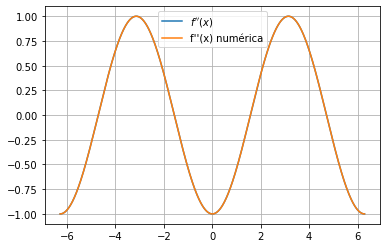

In [77]:
#Para comprobar que la función anterior se aproxima a la derivada en una función f con una malla uniforme
#Se escoge la malla uniforme

x = (np.linspace(-2*pi, 2*pi, 5000) )
#Usamos una función de prueba
y = cos(x)
y_deriv_2 = -cos(x)
y_deriv_2_num = deriv_2(y,x)
#Graficamos para ver que la derivada numerica sí concuerda con la derivada analítica
plot(x,y_deriv_2,label="$f''(x)$")
plot(x,y_deriv_2_num,label="f''(x) numérica")
legend(),grid()
show()

#### 2. Utilizando las funciones anteriores calcule el tiempo promedio para una malla con 500 puntos en cadauno de los algoritmos anteriores. De una explicación de las ventajas y desventajas de cada una las funciones antes mencionadas.

In [78]:
Obtenemos el tiempo con una malla uniforme y la función para la segunda derivada númerica de orden 4 obtenida en a)

SyntaxError: invalid syntax (<ipython-input-78-23e3fe170bbe>, line 1)

In [79]:
#malla  en la variable x con 500 puntos
#se aplica la función
x = (np.linspace(0, 2*pi, 500))
#Ahora se define la función que se va a derivar
y = cos(x)
# y también la segunda derivada númerica de orden 4
y_deriv_1_num = deriv(y,x)

#tiempo de la función
%timeit (deriv(y,x))

16.8 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
Tiempo con una malla no uniforme y la función para la primera derivada númerica de orden 2

SyntaxError: invalid syntax (<ipython-input-80-db97baa1273f>, line 1)

In [ ]:
#malla en la variable x con 500 puntos
#se aplica la función 
x = (np.linspace(0, 2*pi, 500))
#Ahora se define la función que se va a derivar
y = cos(x)

# y también la primera derivada númerica de orden 4
y_deriv_1_num = deriv_1(y,x)

#tiempo de la función 
%timeit (deriv_1(y,x))

In [ ]:
Tiempo con una malla no uniforme y la función para la segunda derivada  numérica de orden 2

In [ ]:
#malla en la variable x con 500 puntos
#se aplica la función 
x = (np.linspace(0, 2*pi, 500) )
#Ahora se define la función que se va a derivar
y = cos(x)
#tiempo de la función 
%timeit (deriv_2(y,x))

Se obtuvo un tiempo más corto  y con la segunda derivada de orden 4 con malla uniforme que con la segunda derivada de orden 2 con malla no uniforma aunque la segunda puede obtener derivadas en cualquier malla.

#### 3. Calcule la derivada analítica de las funciones $f(x)=e^{-x^{2}}sin(10x)$ con $x \in [-5,5]$ y $g(x)=-\frac{2}{x^{6}}+{\frac{1}{x^{12}}}$ con $x \in [0.5, 5]$. Realice las gráficas de las funciones y sus primeras dos derivadas. Con las funciones del problema 1, encuentre una malla adecuada para cada caso en el que el error de cálculo sea menor que $10^{−5}$ para cualquier punto. ¿Las mallas tienen el mismo espacio entre puntos de la malla?, explique porque si o porque no

Obtenemos las derivadas analíticas para cada función:

Para f(x) tenemos:
$$f(x) = e^{−x^{2}} sin(10x)$$

$$f^{(1)}(x)=2e^{-x^{2}}(5\cos(10x)-x\sin(10x)) $$

$$f^{(2)}=e^{-x^{2}}(2(2x^{2}-51)\sin(10x)-40x\cos(10x))$$

Para g(x) tenemos: 
$$g(x)=-\frac{2}{x^{6}}+{\frac{1}{x^{12}}}$$
$$g^{(1)}(x)={\frac{12}{x^{-7}}}-{\frac{12}{x^{13}}} $$
$$g^{(2)}(x)=-\frac{84}{x^{-8}}+\frac{156}{x^{-14}}  $$

Graficando para $f(x)$ con $x \in [-5,5]$ 

In [ ]:
#para f(x) tenemos 1000 puntos en el intervalo [-5,5]
x=(linspace(-5,5,1000))
#función f(x) 
y=exp(-(x**2))*sin(10*x)

plot(x,y,label="f'(x)")

legend(),grid()
show()

Graficando para $g(x)$ con $x \in [-5,5]$ 

In [ ]:
#para g(x) tenemos 1000 puntos en el intervalo [-5,5]
x=(linspace(0.5,5,1000))
#función g(x) 
y=-2/x**6+1/x**12
plot(x,y,label="g(x)")
legend(),grid()
show()

Gráficas de las primeras derivadas ($f(x)$)

In [ ]:
#tenemos 1000000 puntos en el intervalo [-5,5]
x=(linspace(-5,5,1000000))
y=exp(-(x**2))*sin(10*x)
#derivada analitica
yp1=2*exp(-(x*x))*(5*cos(10*x)-x*sin(10*x))
##Para una malla no uniforme
yp1_num=deriv_1(y,x)

#Graficamos ambas derivadas
plot(x,yp1,label="f'(x)")
plot(x,yp1_num,label="f'(x) númerica")
legend(),grid()
show()
#Escribe el máximo error entre puntos
print("Error asociado a la segunda derivada no uniforme =" ,
      max(abs(yp1-yp1_num)) )

In [ ]:
#tenemos 1000000 puntos en el intervalo [-5,5]
x=(linspace(-5,5,1000000))#
y=exp(-(x**2))*sin(10*x)
## La derivada analitica
yp2_2=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
##para una malla no uniforme
yp2_2_num=deriv_2(y,x)

#Graficamos ambas derivadas
plot(x,yp2_2,label="f'(x)")
plot(x,yp2_2_num,label="f'(x) númerica")
legend(),grid()
show()
#Escribe el máximo error entre puntos
print("Error asosiado a la segunda derivada no uniforme =" ,
      max(abs(yp2_2-yp2_2_num)) )

In [ ]:
x=(linspace(-5,5,5000))#
y=exp(-(x**2))*sin(10*x)
## La derivada analitica
yp2_2=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
##La derivada analítica para una malla no uniforme
yp2_2_num=deriv(y,x)

#Graficamos ambas derivadas
plot(x,yp2_2,label="f'(x)")
plot(x,yp2_2_num,label="f'(x) númerica")
legend(),grid()
show()
#Escribe el máximo error entre puntos
print("Error asociado a la segunda derivada no uniforme =" ,
      max(abs(yp2_2-yp2_2_num)) )

Gráficas de las primeras derivadas ($g(x)$)

In [ ]:
def malla(x):
    return tan(x)

y1=(linspace(1,1.5,10000))
y2=linspace(1.5,2,500)
y3=linspace(2,3.5,500)
y2=linspace(3.5,5,100)

def malla(x):
    return 2*tanh(x) 


x1=(linspace(0.5,0.55,100000,endpoint=True))
x2=(linspace(0.55,0.6,50500))
result=np.concatenate((x1,x2))
m = []
for item in result:
    if item not in m:
        m.append(item)
        

x=x1
#,axis=0)
y=-2/x**6+x**(-12)

## Derivada analitica
yp1=12/x**7-12*x**(-13)

yp1_num=deriv_1(y,x)

plot(x,yp1,label="f'(x)")
plot(x,yp1_num,label="f'(x) númerica")
legend(),grid()
show()
#Escribe el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yp1-yp1_num)) )

In [ ]:
x=(linspace(-5,5,100000000))

y=exp(-(x**2))*sin(10*x)

# Derivada analitica
yp2_1=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))

#Derivada analítica con una malla no uniforme

yp2_1_num=deriv(y,x)

#Graficando derivadas:

plot(x,yp2_1,label="f'(x)")
plot(x,yp2_1_num,label="f'(x) númerica")

legend(),grid()
show()

#Escribe el máximo error entre puntos

print("Error de la segunda derivada no uniforme =" ,
      max(abs(yp2_1-yp2_1_num)) )


In [ ]:
x=linspace(0.5,5,70000)
y=exp(-(x1*x1))*sin(10*x1)
yp2=exp(-(x1*x1))*(((4*x1*x1-102)*sin(10*x1))-(40*x1*cos(10*x1)))

yp2_num=deriv_2(y,x1)

plot(x1,yp2,label="f(x)")
plot(x1,yp2_num,label="f''(x) númerica")
legend(),grid()

show()
#Escribe el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yp2-yp2_num)) )


Derivada y las mallas para $g(x)$.

In [ ]:
x=(linspace(0.5,5,70000))

y=-2/x**6+1/x**12

# segunda derivada analitica

yp2_1=-84/x**8+156/x**14
#Derivada analítica para una malla no uniforme

#Derivada analítica para una malla no uniforme
yp2_1_num=deriv(y,x)

#Graficamos de las derivadas:
plot(x,yp2_1,label="f'(x)")
plot(x,yp2_1_num,label="f'(x) númerica")
legend(),grid()
show()

#Escribe el máximo error entre puntos

print("Error de la segunda derivada no uniforme =" ,
      max(abs(yp2_1-yp2_1_num)) )

In [ ]:

x=(linspace(0.5,5,4000000))

y=-2/x**6+1/x**12

# segunda derivada analitica

yp2_1=-84/x**8+156/x**14

#La derivada analítica para una malla no uniforme

yp2_1_num=deriv_2(y,x)

#Graficamos ambas derivadas

plot(x,yp2_1,label="f'(x)")
plot(x,yp2_1_num,label="f'(x) númerica")
legend(),grid()
show()
#Escribe el máximo error entre puntos

print("Error de la segunda derivada no uniforme =" ,
      max(abs(yp2_1-yp2_1_num)) )

In [ ]:
x=(linspace(0.5,5,50000))

y=-2/x**6+1/x**12
# segunda derivada aanlítica

yp1=12/x**7-12/x**13
# segunda derivada analitica con malla no uniforme


yp1_num=deriv_1(y,x)

#Graficamos ambas derivadas

plot(x,yp1,label="f'(x)")

plot(x,yp1_num,label="f'(x) númerica")

legend(),grid()
show()

#Escribe el máximo error entre dos puntos

print("Error de la segunda derivada no uniforme =" ,
      max(abs(yp1-yp1_num)))

#### 4. Suponga que tiene la función $sinc(x) =\frac{ sin(3x)}{3x}$ en el intervalo$ [−2π, 2π]$. Calcule la derivada analítica de dicha función y calcule la derivada numérica utilizando una malla uniforme.

Tenemos:
$$f(x) =\frac{ sin(3x)}{3x}$$
$$\rightarrow f'(x)=\frac{3x\cos(3x)-\sin(3x)}{3x^2}  $$

$$f''(x)=\frac{(2-9x^{2})\sin(3x)-6x\cos(3x)}{3x^{3}}$$

(a) Dependiendo del lenguaje de programación que utilice, averigue la manera de obtener los tiempos de ejecución para calcular la derivada utilizando los algoritmos de $2^{\circ}$ y $4^{\circ}$ orden.

Basandonos en el Notebook 5 -Tiempos de ejecución de una sección de código tenemos que:

Se utlizará la biblioteca time

In [ ]:
import time
import matplotlib.pyplot as plt
from pylab import *

Tiempo de ejecución de la primer derivada en una malla uniforme

#Se definine la malla donde se evaluará la función

In [ ]:
x = linspace(-2*pi,2*pi,500)
## Empieza a contar el tiempo
inicio = time.time()
## se define la función a la que se medirá el tiempo de ejecución
deriv_1=(sin(3*x)/(3*x),x)
##termina de contar el tiempo
fin = time.time()
#Se resta el tiempo inicial y el tiempo final y obtenemos el tiempo de ejecución
t_i = fin - inicio 
print("El tiempo de ejecución de la primera derivada es: ",t_i)



Para una mejor aproximación:

In [ ]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv_1=(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la primera derivada es:  ",mean(t_is))

 tiempo de ejecución para la segunda derivada:

In [ ]:
# Para una malla no uniforme
#Se defininé la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#definimos la función a la que se medirá el tiempo de ejecución
deriv_2=(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Se resta el tiempo inicial y el tiempo final y obtenemos el tiempo de ejecución
t_i = fin - inicio 
print("Tiempo de ejecución de la segunda derivada es: ",t_i)

Para tener una mejor medición podemos utilizar un ciclo for y hacer varias veces el cálculo para que al final podamos obtener una medición promedio.

In [ ]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv_2=(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la segunda derivada:  ",mean(t_is))


tiempo de ejecución para la segunda derivada de orden 4:

In [ ]:
##Obteniene los tiempos de ejecución de la segunda derivada de orden 4
#Iniciamos definiendo la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#define la función a la que se medirá el tiempo de ejecución
deriv=(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Restando tiempps
t_i = fin - inicio 
print("Tiempo de ejecución de la segunda derivada de orden 4 es: ",t_i)

Para tener una mejor medición podemos utilizar un ciclo for y hacer varias veces el cálculo para que al final podamos obtener una medición promedio.

In [ ]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv=(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la segunda derivada:  ",mean(t_is))

(b) Comparando con la solución analítica, encuentre el espacio entre los puntos de la malla para que el error máximo en el cálculo sea menor a $10^{-5}$ para cada algoritmo.


In [81]:
x=linspace(-2*pi,2*pi,7500)
#espacio entre los puntos:
h=x[1]-x[0]
#definendo la función a la que se le aplicará la primera derivada
f=sin(3*x)/(3*x)
## La derivada analitica
fprima1=(3*x*cos(3*x)-sin(3*x))/(3*x*x)
##derivada númerica definida con malla no uniforme
fprima1_num=deriv_1(f,x)

print("Error de la primer derivada no uniforme es:" ,
      max(abs(fprima1-fprima1_num)) )
print("El espacio entre los puntos es:",h)

Error de la primer derivada no uniforme es: 3.0087616169627296e-06
El espacio entre los puntos es: 0.0016757395138498055


Para la segunda derivada:

In [82]:

x=linspace(-2*pi,2*pi,2*550000)

# espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la primera derivada
f=sin(3*x)/(3*x)
## La derivada analitica
fprima2=((2-9*x**2)*sin(3*x)-6*x*cos(3*x))/(3*x**3)

#yprima2=exp(-(x*x))*(((2*x*x-102)*sin(10*x))-(40*x*cos(10*x)))
fprima2_num=deriv_2(f,x)

print("Error de la segunda derivada no uniforme es" ,
      max(abs(fprima2-fprima2_num)) )
print("El espacio entre los puntos es:",h)

Error de la segunda derivada no uniforme es 1.6087392863239902e-05
El espacio entre los puntos es: 1.1423983671043914e-05


In [83]:
x=linspace(-2*pi,2*pi,2*550000)
#obteniendo el espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la primera derivada
f=sin(3*x)/(3*x)
## La derivada analitica
fprima2_1=((2-9*x**2)*sin(3*x)-6*x*cos(3*x))/(3*x**3)

#yprima2=exp(-(x*x))*(((2*x*x-102)*sin(10*x))-(40*x*cos(10*x)))
fprima2_num_1=deriv(f,x)

print("Error de la segunda derivada de orden 4 =" ,
      max(abs(fprima2_1-fprima2_num_1)) )
print("El espacio entre los puntos es:",h)

Error de la segunda derivada de orden 4 = 1.612089713076692e-05
El espacio entre los puntos es: 1.1423983671043914e-05


(c)Realiza grafica “Número de puntos en el espaciamiento de la malla” vs “Tiempo de ejecución” partiendo de un espaciamiento en los puntos en la malla de 0.25 hasta el espaciamiento encontrado en el inciso b). Por o menos considere 15 puntos, es decir 15 mallas deferentes, para realizar este ejercicio.


In [85]:

#Se define el rango de números de malla en el que se evaluará el tiempo
num_puntos = linspace(25,7500,15)
#y=linspace(-2*pi,0,500000)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):                        
        x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    #h=x[1]-x[0]
    #print(h)
    n_experimentos = 200
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv_1=(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempo promedio para la primer derivada")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [$\mu s$]")
plot(num_puntos,tiempos*1e6,'o-')
grid()
show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [ ]:
#Se define el rango de números de malla en que evaluaremos el tiempo
num_puntos = linspace(25,2*550000,15)

#y=linspace(-2*pi,0,500000)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):      
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    #h=x[1]-x[0]
    #print(h)
    n_experimentos = 2
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv_2=(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempo promedio para la segunda derivada obtenida con malla no uniforme")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [$\mu s$]")
plot(num_puntos,tiempos*1e6,'o-')
grid()
show()

In [ ]:
num_puntos = linspace(13,2*550000,15)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))    
   
    n_experimentos = 2
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv=(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempo promedio para la segunda derivada de orden 4")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [$\mu s$]")
plot(num_puntos,tiempos*1e6,'o-')
grid()
show()

#for nos ayuda a calcular dichos tiempos y guardarlos en una variabl

(d) ¿Qué puede concluir de este experimento numérico? 